# Capstone Project Reclothes - Machine Learning Section
Made by:
- Bagus Hariyadi
- Muhamad Rafli Susanto

## Import Library

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import re

from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

## Image and Label Preprocessing

In [2]:
# Define the path to the dataset
dataset_path = 'fabrics/'

# Initialize lists to store the images and labels
images = []
labels = []

# Iterate through the fabric folders
for fabric_name in os.listdir(dataset_path):
    fabric_folder = os.path.join(dataset_path, fabric_name)
    
    # Iterate through the numbered folders
    for number_folder in os.listdir(fabric_folder):
        number_folder_path = os.path.join(fabric_folder, number_folder)
        
        # Retrieve the fabric images
        image_paths = glob(os.path.join(number_folder_path, '*.[jp][pn]g'))
        
        if fabric_folder == "fabrics/Blended":
            label_path = label_path = glob(os.path.join(number_folder_path, '*.txt'))
            with open(label_path[0], 'r') as file:
                # Read the second line and split the tags
                tags = file.readlines()[1].strip()
                label = []
                
                # specify regex pattern to capture tag
                pattern = r"([a-zA-Z]+?) ([0-9]+)"
                
                pair_label_probs = re.findall(pattern, tags)
                for label_prob in pair_label_probs:
                    if int(label_prob[1]) >= 25:
                        if label_prob[0] == "Naylon":
                            label.append("nylon")
                        else:
                            label.append(label_prob[0].lower())
                
                if len(label) >= 3:
                    print(f"{number_folder_path} --> {label}")
        else:
            
            label = [fabric_folder.split("/")[1].lower()]
        # Retrieve the label from the txt file
        # label_path = glob(os.path.join(number_folder_path, '*.txt'))
        
        # try:
        #     with open(label_path[0], 'r') as file:
        #         # Read the second line and split the tags
        #         tags = file.readlines()[1].strip().split()
        #         # Extract individual fabric tags as labels
        #         label = []
        #         for tag in tags:
        #             tag = tag.strip('?')  # Remove '?' symbol
        #             if re.match(r'\d+(?:\.\d+)?$', tag):  # Check for floating numbers
        #                 continue
        #             if re.search(r'\d', tag):  # Check for digits inside the string
        #                 continue
        #             if not tag:  # Check for empty string
        #                 continue
        #             label.append(tag.lower())  
        # except:
        #     continue
        
        # Load and process the fabric images
        for image_path in image_paths:
            # Load the image
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
            
            # Append the label to the labels list
            labels.append(label)

# Convert the labels into a list of lists
processed_labels = labels

# Initialize the MultiLabelBinarizer and fit-transform the processed labels
mlb = MultiLabelBinarizer()
binary_labels = mlb.fit_transform(processed_labels)
num_classes = len(mlb.classes_)

print(binary_labels.shape)

fabrics/Blended\575 --> ['cotton', 'polyester', 'viscose']
fabrics/Blended\576 --> ['cotton', 'polyester', 'viscose']
fabrics/Blended\577 --> ['cotton', 'polyester', 'viscose']
fabrics/Blended\578 --> ['cotton', 'polyester', 'viscose']
fabrics/Blended\579 --> ['cotton', 'polyester', 'viscose']
fabrics/Blended\580 --> ['cotton', 'polyester', 'viscose']
fabrics/Blended\989 --> ['wool', 'polyester', 'viscose', 'acrylic']
fabrics/Blended\990 --> ['wool', 'polyester', 'viscose', 'acrylic']
fabrics/Blended\991 --> ['wool', 'polyester', 'viscose', 'acrylic']
fabrics/Blended\992 --> ['wool', 'polyester', 'viscose', 'acrylic']
fabrics/Blended\993 --> ['wool', 'polyester', 'viscose']
(7385, 32)


In [3]:
sample = "Polyester 50 Viscose 35 Wool 15 Mpoukle mallino"
test = sample.split()

pattern = r"([a-zA-Z]+?) ([0-9]+)"
label_probs = re.findall(pattern, sample)

result = []
for label in label_probs:
    if int(label[1]) >= 25:
        result.append(label[0])
result

['Polyester', 'Viscose']

## Visualizing Data

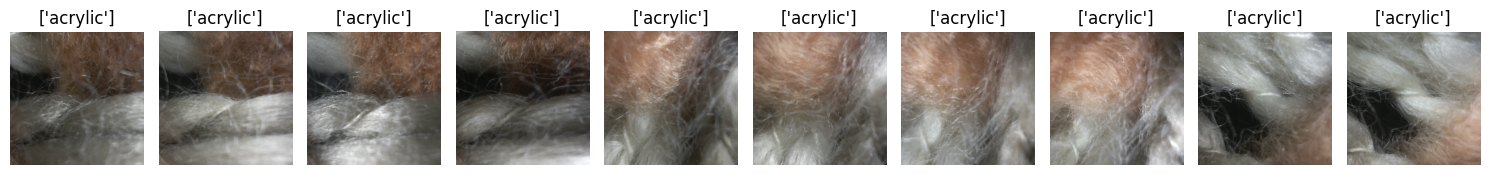

In [4]:
# Define the number of images to display
num_images = 10

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, num_images, figsize=(15, 3), subplot_kw={'aspect': 'equal'})

# Iterate through the first 10 images and labels
for i in range(num_images):
    image = images[i]
    label = labels[i]

    # Display the image
    axes[i].imshow(image)
    axes[i].set_title(label)
    axes[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
print("Labels:", labels)
print("Num of class:", num_classes)

Labels: [['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['acrylic'], ['artificial_fur'], ['artificial_fur'], ['artificial_fur'], ['artificial_fur'], ['artificial_leather'], ['artificial_leather'], ['artificial_leather'], ['artificial_leather'], ['artificial_leather'], ['artificial_leather'], ['artificial_leather'], ['artificial_leather'], ['artificial_leather'], ['artificial_leather'], ['artificial_leather'], ['artificial_leather'],

## Split Dataset

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, binary_labels, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.7, random_state=42)

In [7]:
X_train, y_train = X_train[:500], y_train[0:500]
X_val, y_val = X_val[:500], y_val[0:500]

## CNN Data Generator (Data Augmentation)

In [8]:
# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit the ImageDataGenerator on the training data
datagen.fit(X_train)

## Data Normalization

In [9]:
# Convert the lists to NumPy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
# X_test = np.array(X_test)

# Normalize the pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0
# X_test = X_test / 255.0

## CNN Model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(400, 400, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.MaxPooling2D(3, 3),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(num_classes, activation='sigmoid')
  ])
  
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 128)      0

### Model Training

In [12]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/10
16/16 [==============================] - 131s 7s/step - loss: 0.3294 - accuracy: 0.4520 - val_loss: 0.1322 - val_accuracy: 0.4680
Epoch 2/10
16/16 [==============================] - 103s 7s/step - loss: 0.1296 - accuracy: 0.4780 - val_loss: 0.1213 - val_accuracy: 0.4680
Epoch 3/10
16/16 [==============================] - 100s 6s/step - loss: 0.1198 - accuracy: 0.4000 - val_loss: 0.1195 - val_accuracy: 0.4680
Epoch 4/10
16/16 [==============================] - 100s 6s/step - loss: 0.1155 - accuracy: 0.4600 - val_loss: 0.1164 - val_accuracy: 0.4980
Epoch 5/10
16/16 [==============================] - 100s 6s/step - loss: 0.1096 - accuracy: 0.4840 - val_loss: 0.1130 - val_accuracy: 0.4460
Epoch 6/10
16/16 [==============================] - 91s 6s/step - loss: 0.1064 - accuracy: 0.4500 - val_loss: 0.1139 - val_accuracy: 0.3400
Epoch 7/10
16/16 [==============================] - 91s 6s/step - loss: 0.1045 - accuracy: 0.4260 - val_loss: 0.1081 - val_accuracy: 0.4580
Epoch 8/10
16/1

In [13]:
pred_val = model.predict(X_val)

In [14]:
FN_SAVED_MODEL = 'fabrics_saved_model'

tf.saved_model.save(model, FN_SAVED_MODEL)

INFO:tensorflow:Assets written to: fabrics_saved_model\assets


In [15]:
loaded = tf.saved_model.load(FN_SAVED_MODEL)

# inspeksi data input
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'conv2d_input': TensorSpec(shape=(None, 400, 400, 3), dtype=tf.float32, name='conv2d_input')})
{'dense_2': TensorSpec(shape=(None, 32), dtype=tf.float32, name='dense_2')}


gambar input berasal dari gambar dengan pixel 400 x 400 dengan rgb, kemudian dioutputkan dengan 32 unit sigmoid

In [16]:
# convert the model into tflite and optimize it by 

converter = tf.lite.TFLiteConverter.from_saved_model(FN_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [17]:
# Save model into tflite format

tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [24]:
# Load TFLite model and allocate tensors.
with open(tflite_model_file, 'rb') as fid:
    tflite_model = fid.read()
    
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output details of the model
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare input data
input_shape = input_details[0]['shape']
X_val = np.array([X_val[0]], dtype=np.float32)  # Assuming X_val is a numpy array
input_data = X_val.reshape(input_shape)

# Set the input tensor data
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run the inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Print the prediction result
print(output_data)

[[1.3053536e-02 7.1164042e-02 7.2911382e-03 4.9725175e-04 2.8626621e-03
  1.3656616e-02 1.9590974e-02 3.5361007e-01 9.4229013e-02 1.8907064e-01
  3.0347705e-04 1.2622774e-03 5.9519112e-03 3.6729962e-02 4.5643151e-03
  2.4660498e-02 2.1800399e-03 2.8335363e-02 5.0849408e-02 4.8735738e-04
  4.0975213e-03 3.1344542e-01 1.2008548e-03 9.7471476e-04 1.9750178e-02
  9.8030031e-02 6.3917041e-04 6.9886446e-04 8.9131594e-03 9.2957914e-03
  1.4065796e-01 8.5413128e-02]]
